In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Dataset = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')
# to avoid encoding error we use unicode escape

In [4]:
Dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
Dataset.shape

(11251, 15)

In [6]:
Dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
#drop empty columns
Dataset.drop(['Status','unnamed1'],axis =1,inplace = True)

In [10]:
Dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# Data Cleaning 

In [11]:
Dataset.shape

(11251, 13)

In [12]:
Dataset.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
Dataset.dropna(inplace=True)

In [14]:
Dataset.shape

(11239, 13)

In [16]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [17]:
#change dtype

Dataset['Amount']= Dataset['Amount'].astype('int')

In [19]:
Dataset.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [20]:
Dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [22]:
Dataset[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

Gender

In [23]:
Dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

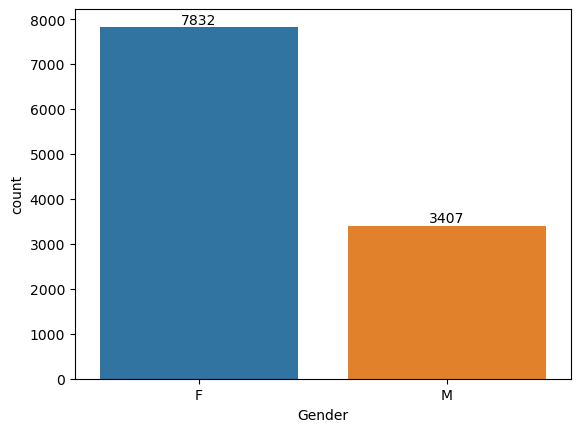

In [29]:
# plotting a bar chart for Gender and it's count
gender_count = sns.countplot(x='Gender',data=Dataset)
for bars in gender_count.containers:
    gender_count.bar_label(bars)

In [31]:

sales_gen = Dataset.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)

In [32]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

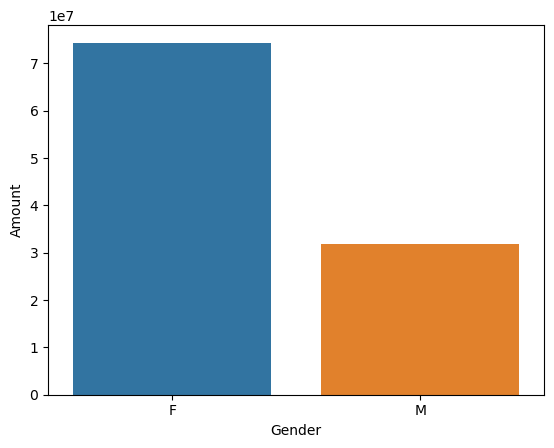

In [33]:
# plotting a bar chart for gender vs total amount
sales_gen = Dataset.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

#Observation
--> From the above graphs we observe that most of the buyers are Female and also the purchasing power in Female are more.

Age

In [35]:
Dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

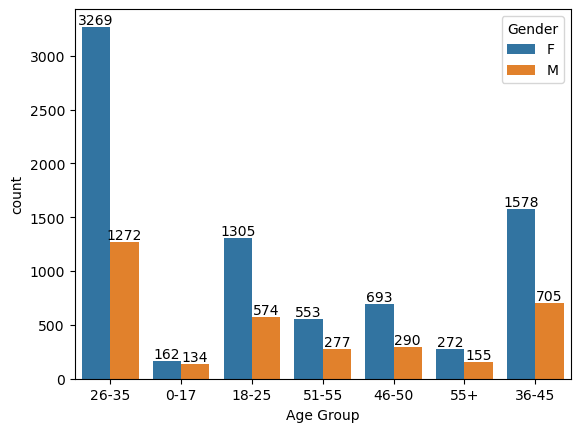

In [41]:
age_grp = sns.countplot(x='Age Group',data = Dataset,hue='Gender')

for bars in age_grp.containers:
    age_grp.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

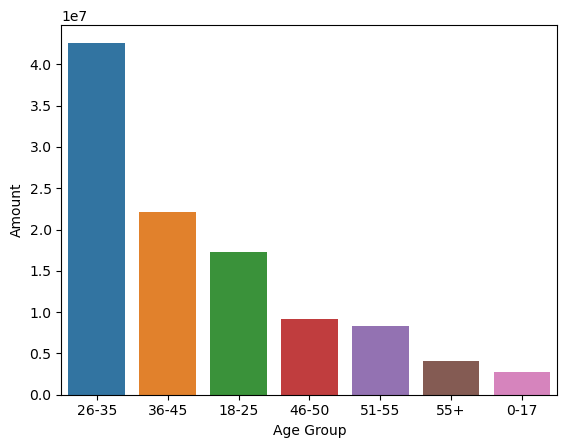

In [44]:
# Total Amount vs Age Group
sales_age = Dataset.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data = sales_age)

Observation ---> From the above graphs we see that most of the buyers are from yhe age group 26yr - 35yr Females

# State

<Axes: xlabel='State', ylabel='count'>

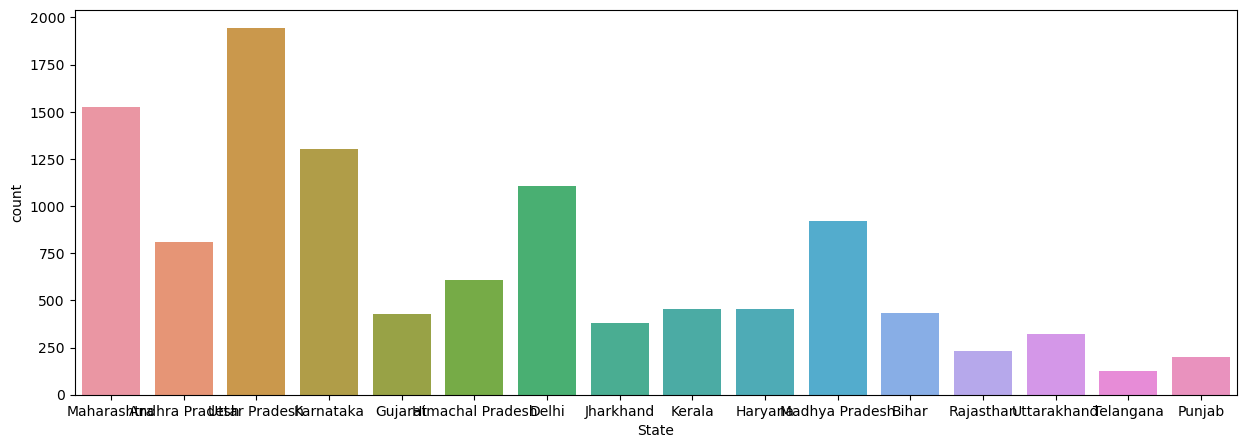

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(x='State' , data =Dataset)

In [48]:
# total amount/sales from top 10 states
state_sales = Dataset.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

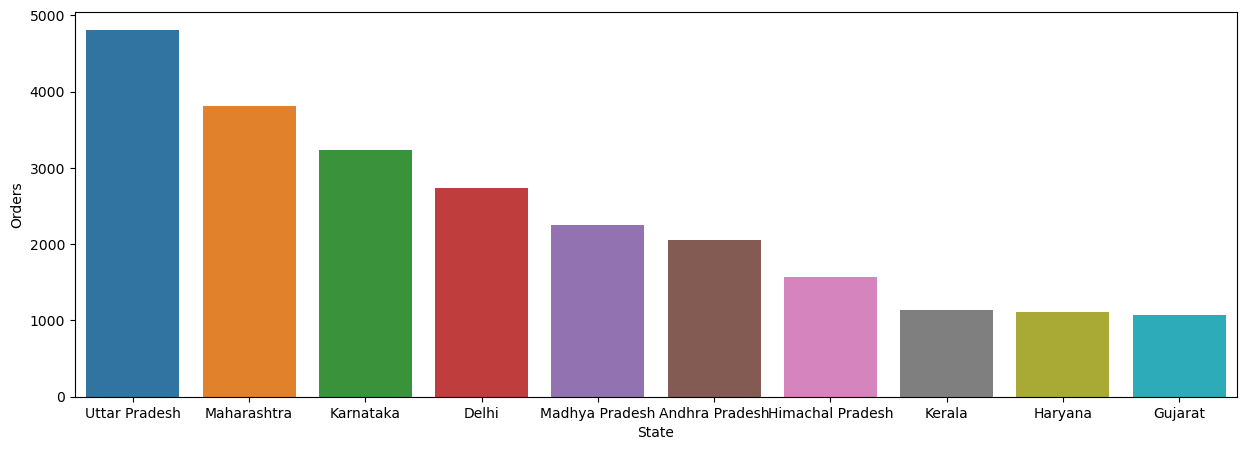

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x='State' ,y='Orders', data =state_sales)

Observation--> From the above chart we observe that mot of the orders we are getting from uttar Pradesh and then Maharashtra ,karnataka

<Axes: xlabel='State', ylabel='Amount'>

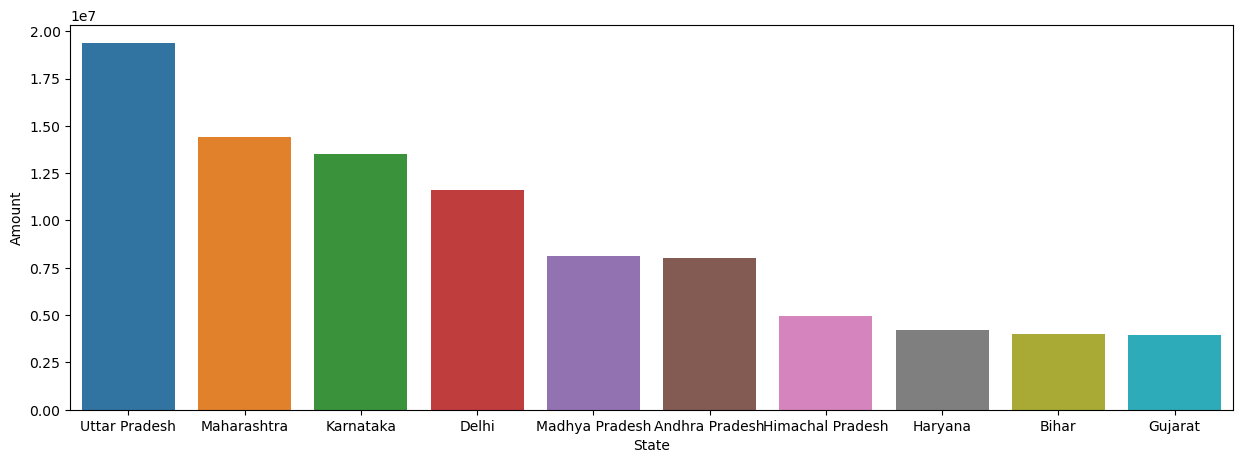

In [52]:
# total amount/sales from top 10 states
state_revn = Dataset.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='State',y='Amount',data=state_revn)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Martial Status

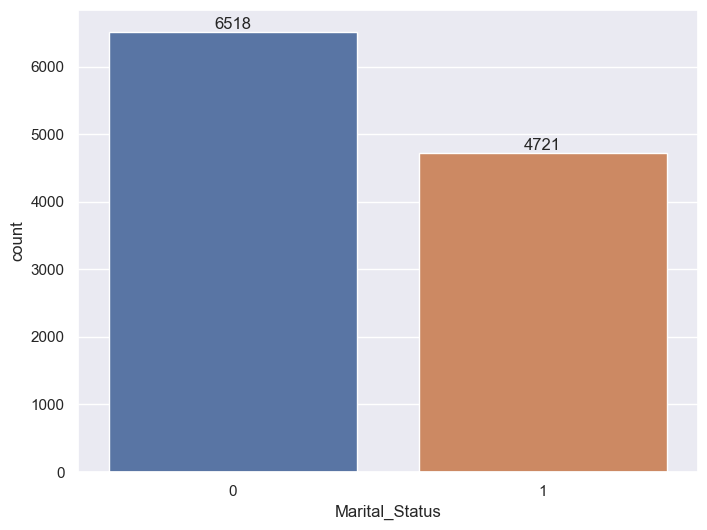

In [58]:
martial_sts =sns.countplot(x='Marital_Status',data=Dataset)

sns.set(rc={'figure.figsize':(8,6)})
for bars in martial_sts.containers:
    martial_sts.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

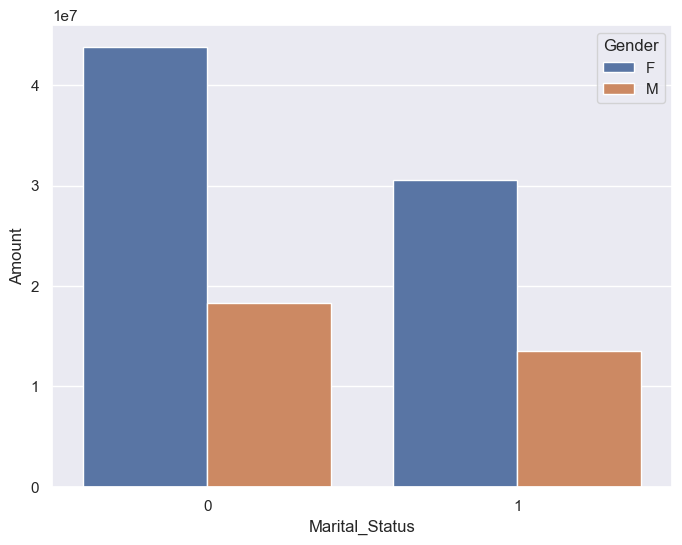

In [60]:
sales_stats = Dataset.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_stats)

Observation --> We observe that  most of the buyers are married (Women)and they have higher purchasing power

# OCCUPATION 

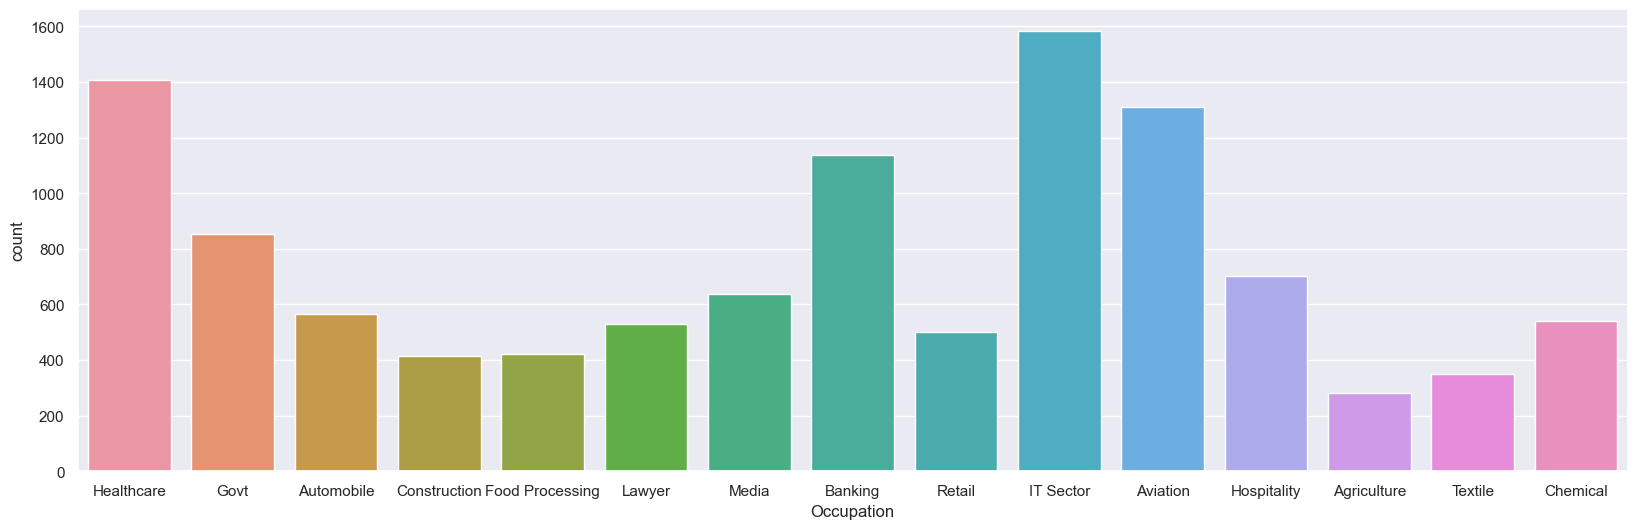

In [64]:
sns.set(rc={'figure.figsize':(20,6)})
occup_sales = sns.countplot(x='Occupation',data=Dataset)

for boxes in occup_sales.containers:
    occup_sales.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

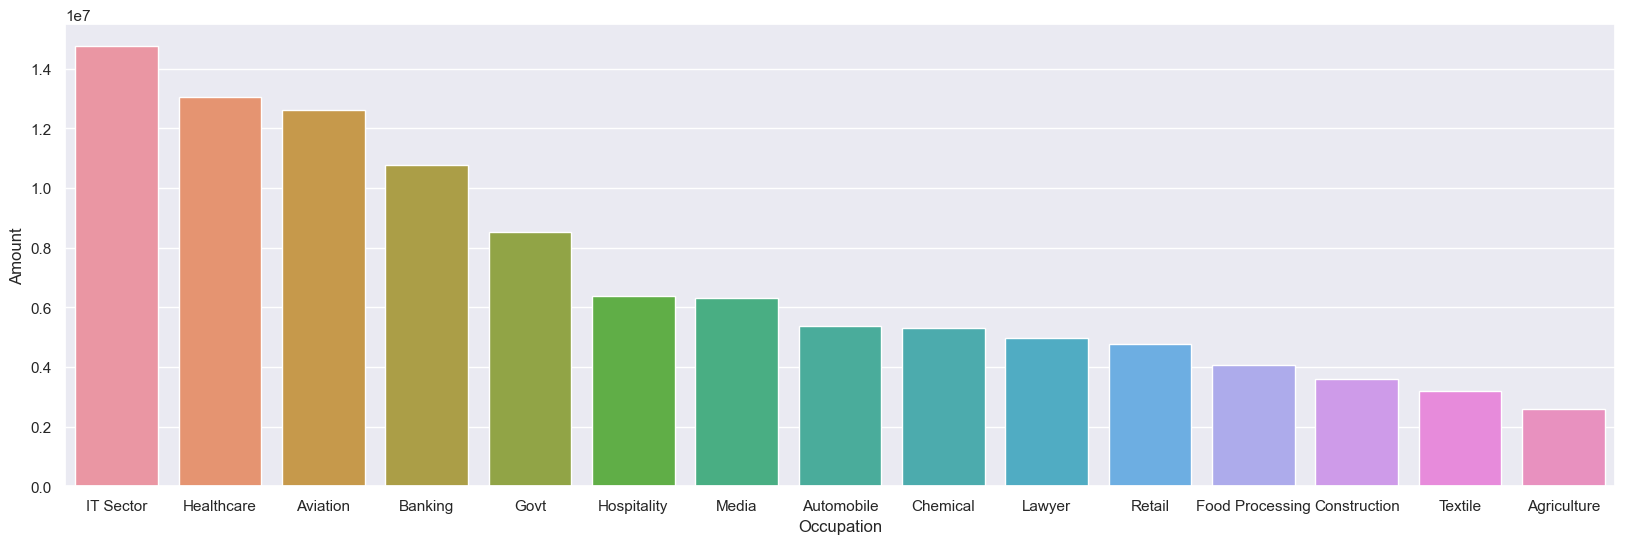

In [66]:
sales_state = Dataset.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='Occupation',y="Amount",data=sales_state)

Observation --> From the graph we can see that most of the buyers are working in IT sector,Healthcare and Aviation Respectively

# Product Category

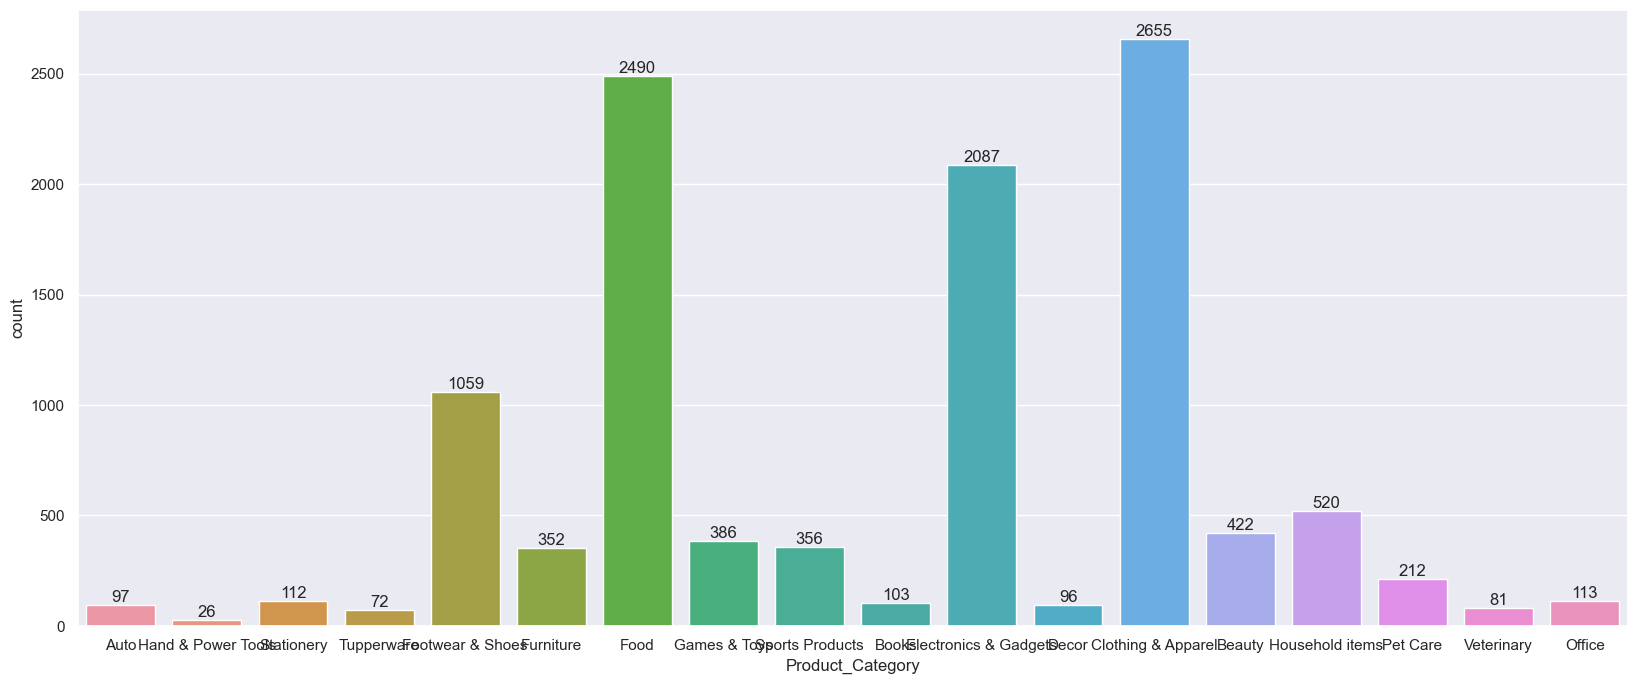

In [69]:
sns.set(rc={"figure.figsize":(20,8)})
pr_cat = sns.countplot(x="Product_Category",data=Dataset)

for bars in pr_cat.containers:
    pr_cat.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

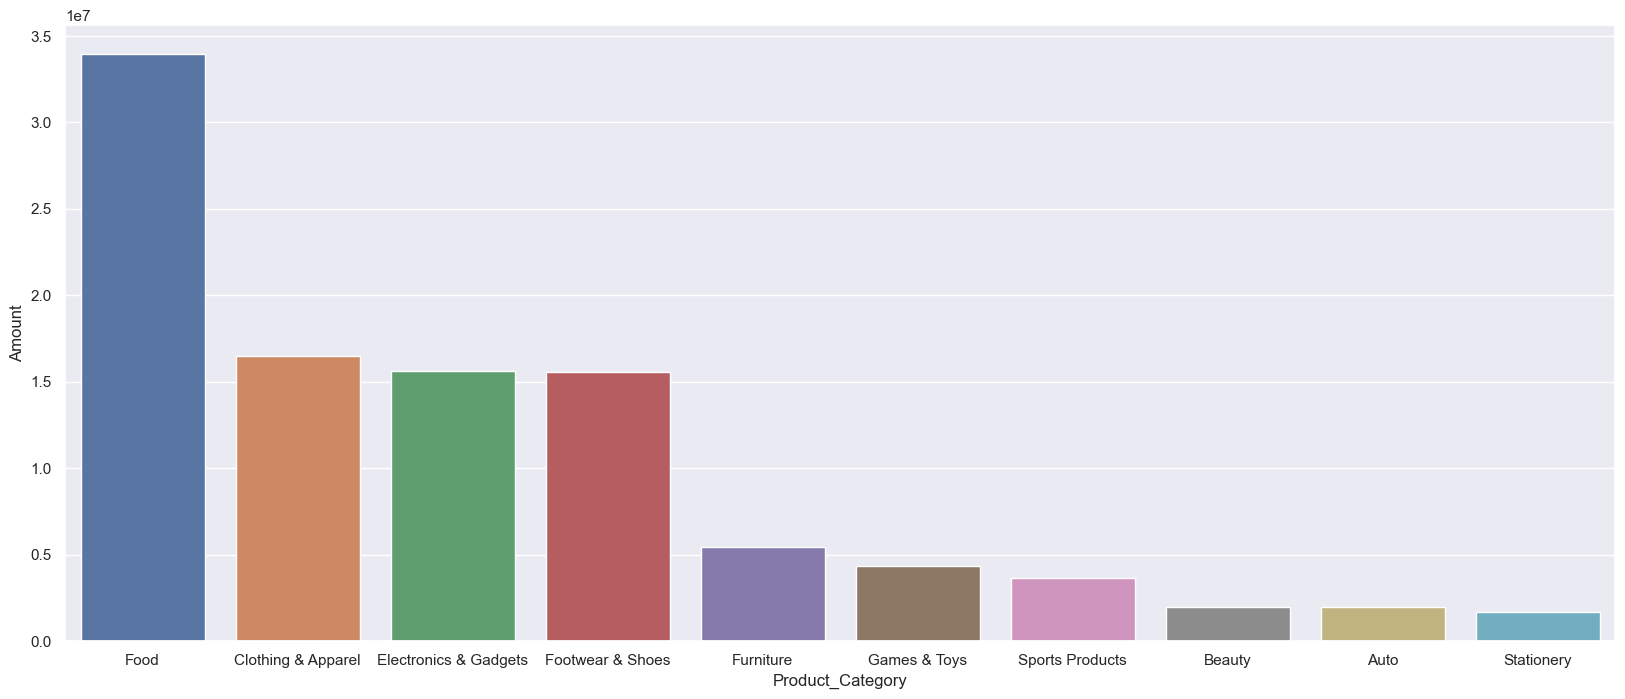

In [72]:
sales_product = Dataset.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.barplot(x='Product_Category',y="Amount",data=sales_product)

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# top 10 most sold products (same thing as above)

<Axes: xlabel='Product_ID'>

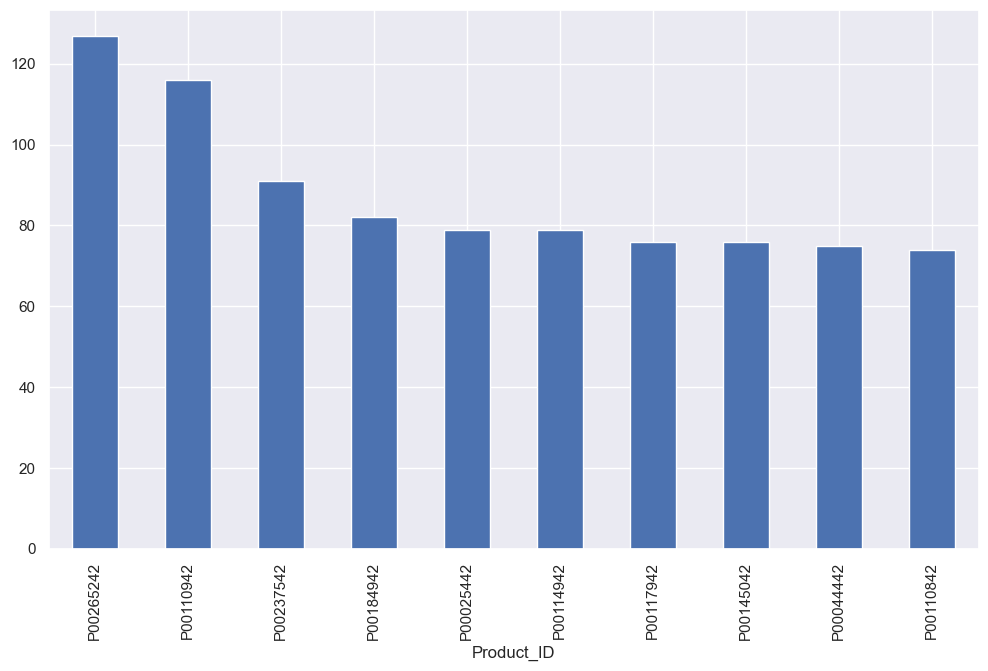

In [75]:
fig1, ax1 = plt.subplots(figsize=(12,7))
Dataset.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')


# Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category